# **LATAR BELAKANG:**

---
Netflix adalah salah satu platform streaming terbesar di dunia, menawarkan berbagai jenis konten termasuk film dan acara TV dari berbagai negara. Dengan pertumbuhan jumlah pengguna yang pesat, penting untuk memahami karakteristik konten yang tersedia di platform ini. Memahami dan memvisualisasikan data ini adalah kunci bagi Netflix untuk membantu dalam memahami preferensi pengguna, tetapi juga memberikan wawasan tentang tren industri dan peluang untuk pengembangan konten yang lebih baik

Dengan menggunakan dataset yang mencakup tipe konten, tahun rilis, negara asal, durasi, dan rating, kita dapat menggali informasi berharga tentang konten yang disediakan oleh Netflix.


# **Contents**

---
1. Content Type on Netflix
2. Release Year of the Movies
3. Content from different Countries
4. Distribution of Movie Duration
5. TV Shows with many seasons
6. Ratings
7. What are the top Categories?
8. Top Actors on Netflix with Most Movie

# **IMPORTING LIBRARIES**

---



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.getcwd()
import datetime as dt

# **DATA INFORMATION**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('netflix_titles.csv', header=0)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
 df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Content Type on Netflix**

---

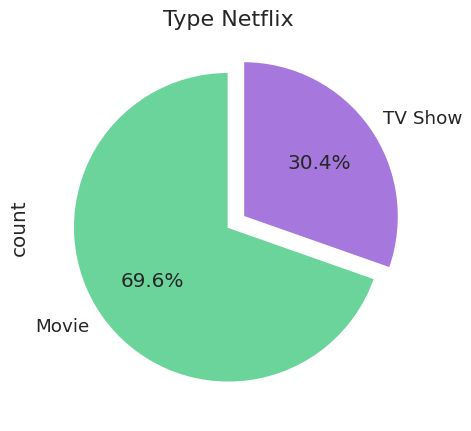

In [ ]:
sns.set(font_scale = 1.2)
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, figsize=(5,10), colors=["#6ad49b", "#a678de"],explode=[0, 0.12])
plt.title(
    label="Type Netflix",
    fontdict={"fontsize":16})
plt.show()

**Release Year of the movies**

---



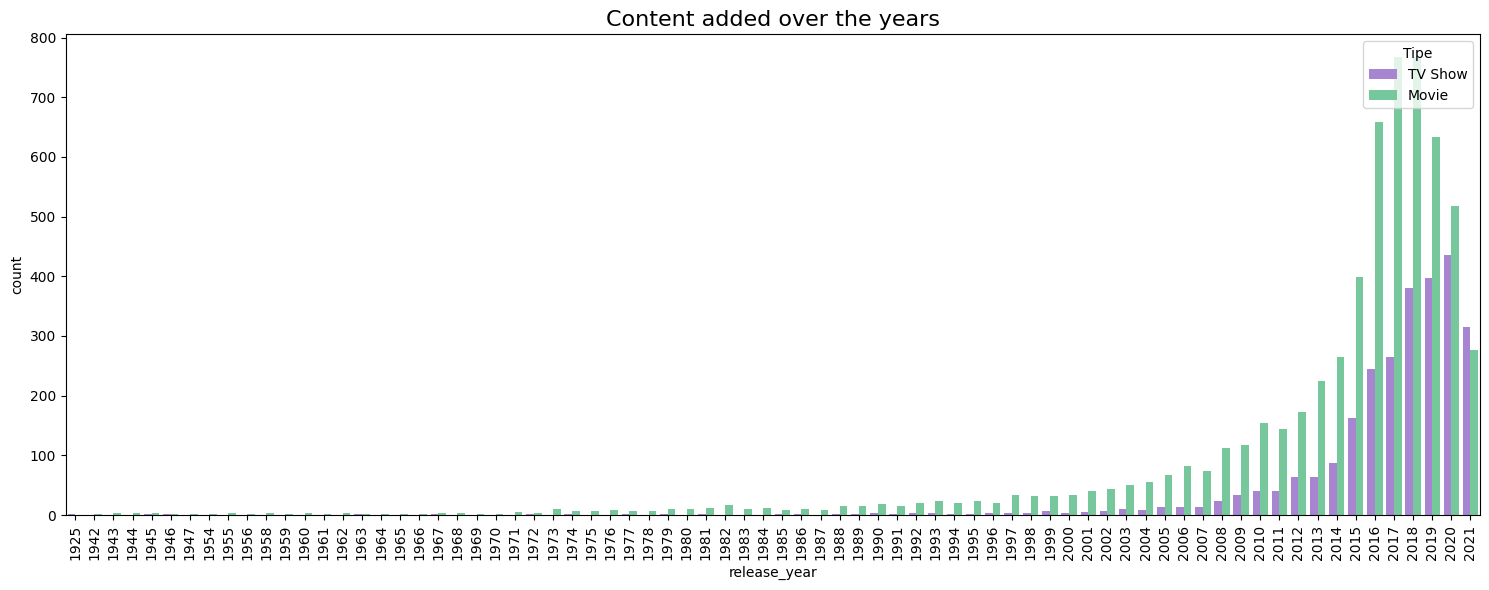

In [ ]:
# Menyiapkan figure
plt.figure(figsize=(15, 6))

# Menggunakan countplot dengan hue dan menentukan warna secara manual
palette = {"TV Show": "#a678de", "Movie": "#6ad49b"}
sns.countplot(x='release_year', data=df, hue='type', palette=palette)

# Menambahkan judul dan label
plt.title('Content added over the years', fontsize=16)

plt.xticks(rotation=90)

# Menampilkan legend
plt.legend(title='Tipe', loc='upper right')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# Mengurutkan berdasarkan release_year dan memfilter hanya untuk Movies
small = df[(df['type'] == 'Movie')]
small_sorted = small.sort_values("release_year", ascending=True)

# Menampilkan 15 entri teratas dengan kolom title dan release_year
result = small_sorted[['title', 'release_year']].head(15)
print(result)

                                                 title  release_year
7790                                    Prelude to War          1942
8205                              The Battle of Midway          1942
8660     Undercover: How to Operate Behind Enemy Lines          1943
8763                   WWII: Report from the Aleutians          1943
8739                Why We Fight: The Battle of Russia          1943
8419  The Memphis Belle: A Story of a\nFlying Fortress          1944
8640                                  Tunisian Victory          1944
8436                                 The Negro Soldier          1944
7575                          Nazi Concentration Camps          1945
7930                                        San Pietro          1945
7219                           Know Your Enemy - Japan          1945
7294                                Let There Be Light          1946
8587                                       Thunderbolt          1947
2375                              

In [ ]:
# Mengurutkan berdasarkan release_year dan memfilter hanya untuk Movies
small = df[(df['type'] == 'TV Show')]
small_sorted = small.sort_values("release_year", ascending=True)

# Menampilkan 15 entri teratas dengan kolom title dan release_year
result = small_sorted[['title', 'release_year']].head(15)
print(result)

                                    title  release_year
4250    Pioneers: First Women Filmmakers*          1925
1331  Five Came Back: The Reference Films          1945
7743  Pioneers of African-American Cinema          1946
8541  The Twilight Zone (Original Series)          1963
8189               The Andy Griffith Show          1967
4550     Monty Python's Fliegender Zirkus          1972
4551         Monty Python's Flying Circus          1974
6549                           Dad's Army          1977
6674                             El Chavo          1979
7588                        Ninja Hattori          1981
7878                             Robotech          1985
2740                          Saint Seiya          1986
7993                           Shaka Zulu          1986
5299                            High Risk          1988
6970                    Highway to Heaven          1988


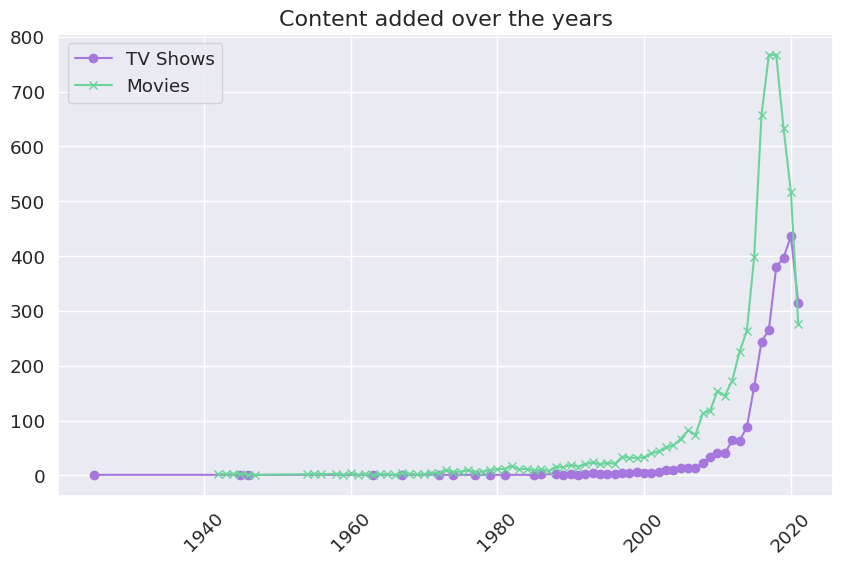

In [ ]:
# Filter data by type (TV Show and Movie)
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

# Prepare the data
# Count the number of TV Shows released each year
tv_show_counts = d1["release_year"].value_counts().sort_index()

# Count the number of Movies released each year
movie_counts = d2["release_year"].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the number of TV Shows released per year
plt.plot(tv_show_counts.index, tv_show_counts.values, label="TV Shows", color="#a678de", marker='o')

# Plot the number of Movies released per year
plt.plot(movie_counts.index, movie_counts.values, label="Movies", color="#6ad49b", marker='x')

# Add title and labels
plt.title("Content added over the years", fontsize=16)

# Add legend
plt.legend(loc="best")

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

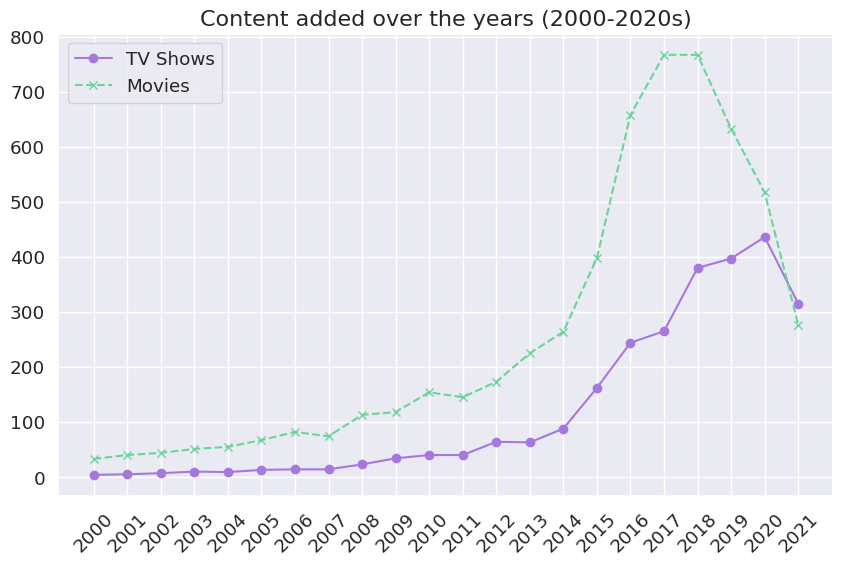

In [ ]:
# Filter data based on type (TV Show and Movie) and release_year (from 2000 onwards)
d1 = df[(df["type"] == "TV Show") & (df["release_year"] >= 2000)]
d2 = df[(df["type"] == "Movie") & (df["release_year"] >= 2000)]

# Prepare the data
# Count the number of TV Shows released each year from 2000 onwards
tv_show_counts = d1["release_year"].value_counts().sort_index()

# Count the number of Movies released each year from 2000 onwards
movie_counts = d2["release_year"].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the number of TV Shows released per year
plt.plot(tv_show_counts.index, tv_show_counts.values, label="TV Shows", color="#a678de", marker='o', linestyle='-')

# Plot the number of Movies released per year
plt.plot(movie_counts.index, movie_counts.values, label="Movies", color="#6ad49b", marker='x', linestyle='--')

# Add title and labels
plt.title("Content added over the years (2000-2020s)", fontsize=16)

# Add legend
plt.legend(loc="best")

# Show the plot
plt.grid(True)  # Optional: Add grid for better readability
plt.xticks(tv_show_counts.index, rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Content from different Countries**

---



In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot
from collections import Counter

# country codes dictionary goes here
# colorscale definition goes here

def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c, v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
        type='choropleth',
        locations=list(country_with_code.keys()),
        z=list(country_with_code.values()),
        colorscale=[[0, "rgb(5, 10, 172)"], [0.65, "rgb(40, 60, 190)"], [0.75, "rgb(70, 100, 245)"],
                    [0.80, "rgb(90, 120, 245)"], [0.9, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
        autocolorscale=False,
        reversescale=True,
        marker=dict(
            line=dict(
                color='gray',
                width=0.5
            )),
        colorbar=dict(
            autotick=False,
            title=''),
    )]

    layout = dict(
        title='',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection=dict(
                type='Mercator'
            )
        )
    )

    fig = dict(data=data, layout=layout)
    iplot(fig, validate=False, filename='d3-world-map')
    return country

# Assuming df is defined and contains 'country' column
country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]

trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

<ipython-input-32-dac886dee967>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




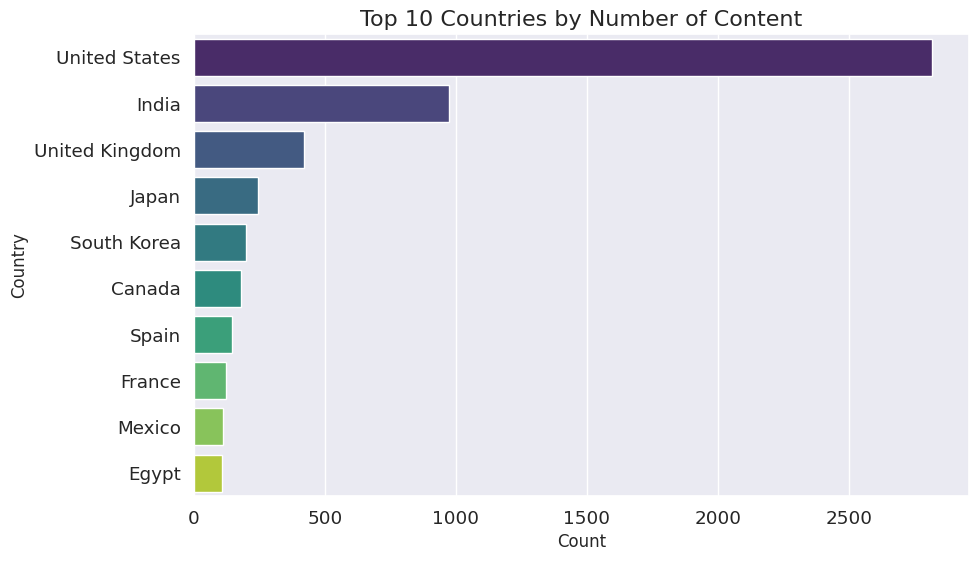

In [ ]:
# Hitung 10 negara teratas berdasarkan jumlah konten
top_10_countries = df['country'].value_counts().head(10)  # Mengambil 10 negara teratas

# Plot the data using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size

# Create bar plot using Seaborn
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')

# Customize the plot
plt.title("Top 10 Countries by Number of Content", fontsize=16)  # Title of the plot
plt.xlabel("Count", fontsize=12)  # X-axis label
plt.ylabel("Country", fontsize=12)  # Y-axis label

# Show the plot
plt.show()

**Distribution of Movie Duration**

---



<ipython-input-35-b62ede354b23>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



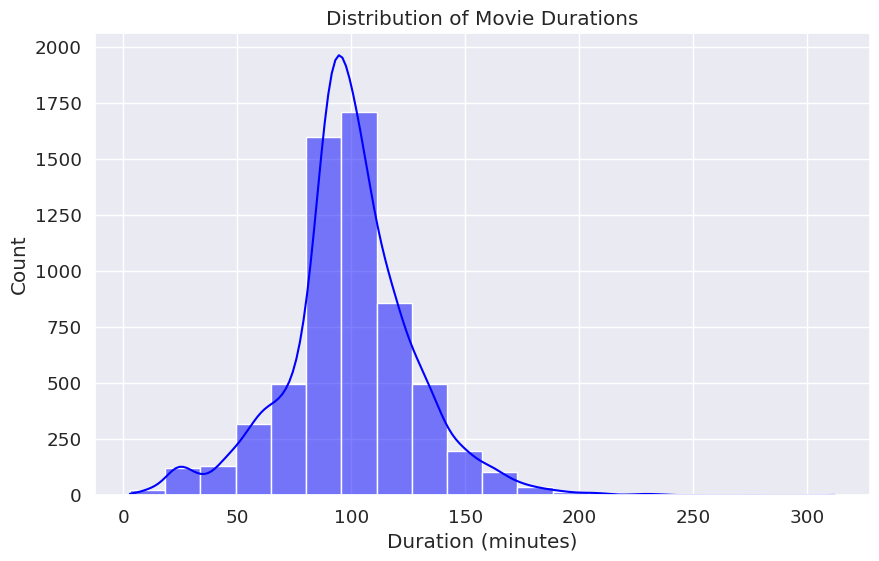

In [ ]:
# Assuming 'df' is your dataframe and it contains 'type' and 'duration' columns
# Filter the data to include only 'Movie' type
df_movie = df[df['type'] == 'Movie']

# Convert the 'duration' column to numeric
# Assuming 'duration' column is in format '120 min', we'll extract the numeric part
df_movie['duration_numeric'] = df_movie['duration'].str.extract('(\d+)').astype(float)

# Plot the distribution of the movie durations
plt.figure(figsize=(10,6))

# Histogram with KDE (Kernel Density Estimation) to show distribution
sns.histplot(df_movie['duration_numeric'], kde=True, color='blue', bins=20)

# Add labels and title
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Movie Durations')

# Show the plot
plt.show()

**TV Shows with many seasons**

---



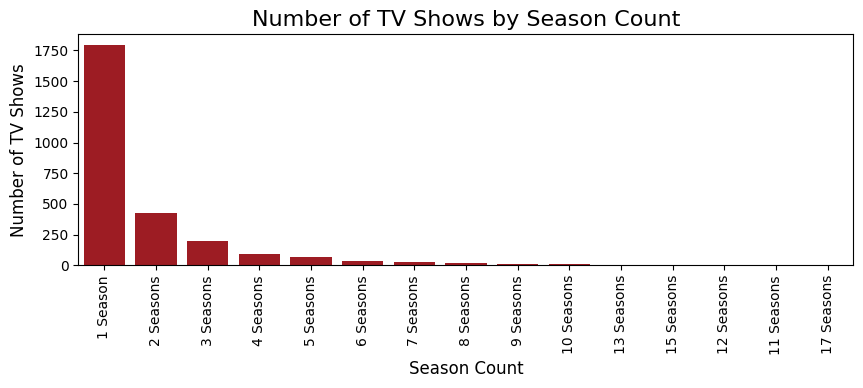

In [ ]:
# Prepare the data
# Asumsi df adalah dataframe yang berisi informasi tentang TV Shows dan memiliki kolom 'season_count' untuk jumlah season
# Misalkan kolom 'type' memiliki nilai 'TV Show' dan 'Movie'
df_tv_shows = df[df['type'] == 'TV Show']  # Filter hanya untuk TV Shows

# Hitung jumlah TV Shows berdasarkan jumlah season
vc_seasons = df_tv_shows['duration'].value_counts().reset_index()
vc_seasons.columns = ['duration', 'count']  # Rename the columns

# Plot the data using Seaborn and Matplotlib
plt.figure(figsize=(10, 3))  # Set the figure size

# Buat barplot menggunakan Seaborn
sns.barplot(x=vc_seasons['duration'], y=vc_seasons['count'], color="#b20710")

# Customize the plot
plt.title("Number of TV Shows by Season Count", fontsize=16)  # Title of the plot
plt.xlabel("Season Count", fontsize=12)  # X-axis label
plt.ylabel("Number of TV Shows", fontsize=12)  # Y-axis label
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed for better readability

# Show the plot
plt.show()

**Ratings**

---



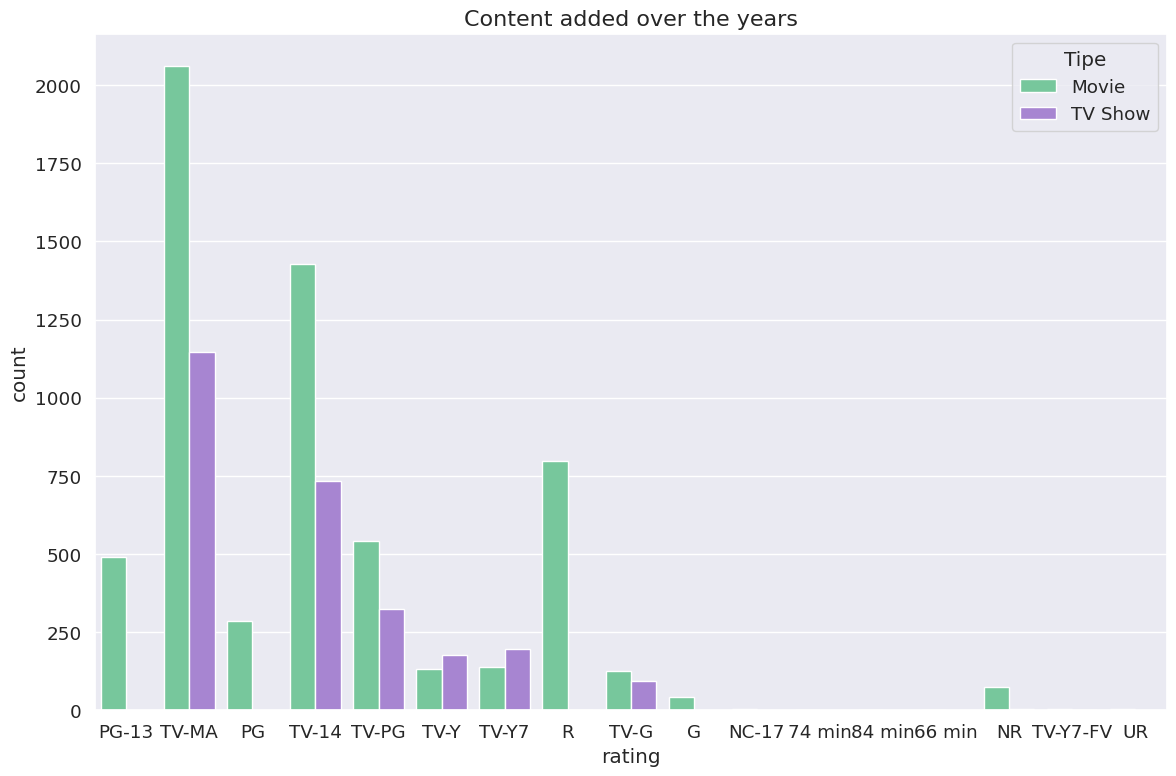

In [ ]:
# Menyiapkan figure
plt.figure(figsize=(12, 8))

# Menggunakan countplot dengan hue dan palette khusus
sns.countplot(x='rating', data=df, hue='type', palette={"TV Show": "#a678de", "Movie": "#6ad49b"})

# Menambahkan judul dan label
plt.title('Content added over the years', fontsize=16)

# Menampilkan legend
plt.legend(title='Tipe', loc='upper right')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# Mengelompokkan berdasarkan rating dan tipe konten (Movie/TV Show)
df_group_yr = df.groupby(['rating', 'type']).size().reset_index(name='count')

# Membuat diagram batang dengan warna berdasarkan tipe konten
fig = px.bar(df_group_yr, x='rating', y='count', color='type', template='simple_white',
             color_discrete_map={"TV Show": "#a678de", "Movie": "#6ad49b"})

# Mengatur layout dari plot
fig.update_layout(
    title={'text': 'Content added over the years',
           'y': 0.95,
           'x': 0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    legend_title='Type'
)

# Update tambahan untuk layout
fig.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=True,
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  title_font=dict(size=20, color='#555', family='Lato, sans-serif'),
                  font=dict(size=12, color='#8a8d93'),
                  hoverlabel=dict(bgcolor='#444', font_size=8, font_family='Lato, sans-serif'))

# Menampilkan plot
fig.show()

**The top Categories**

---



Text(0.5, 1.0, 'Top 10 Genres of Movie')

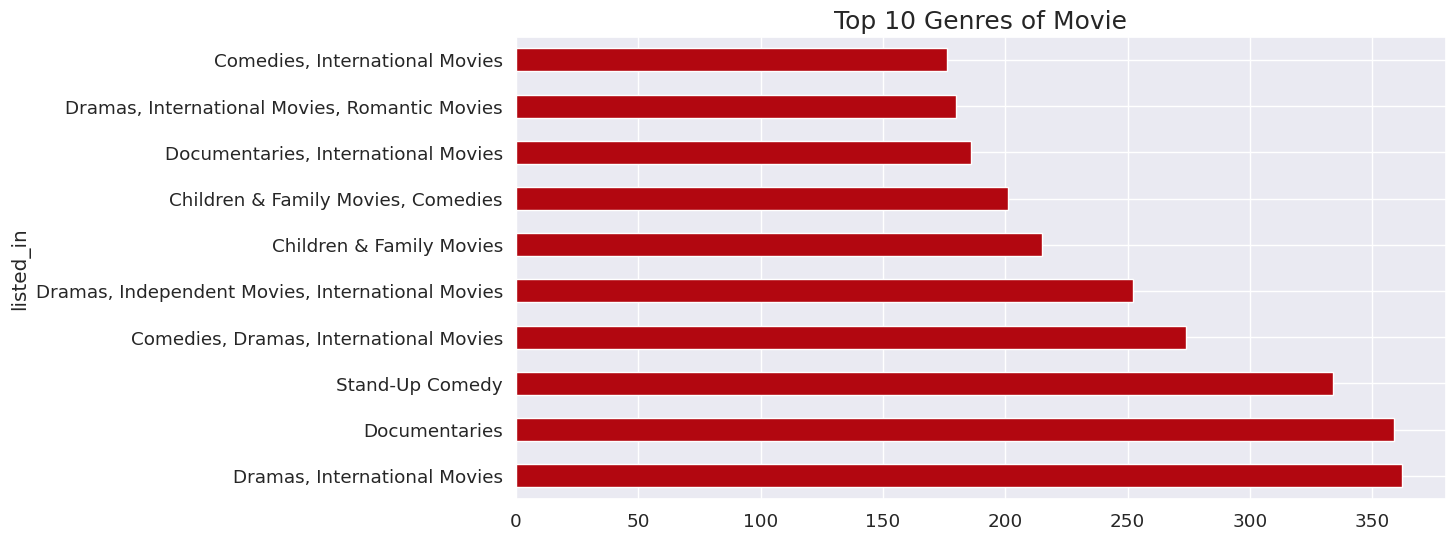

In [ ]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="#b20710")
plt.title("Top 10 Genres of Movie",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

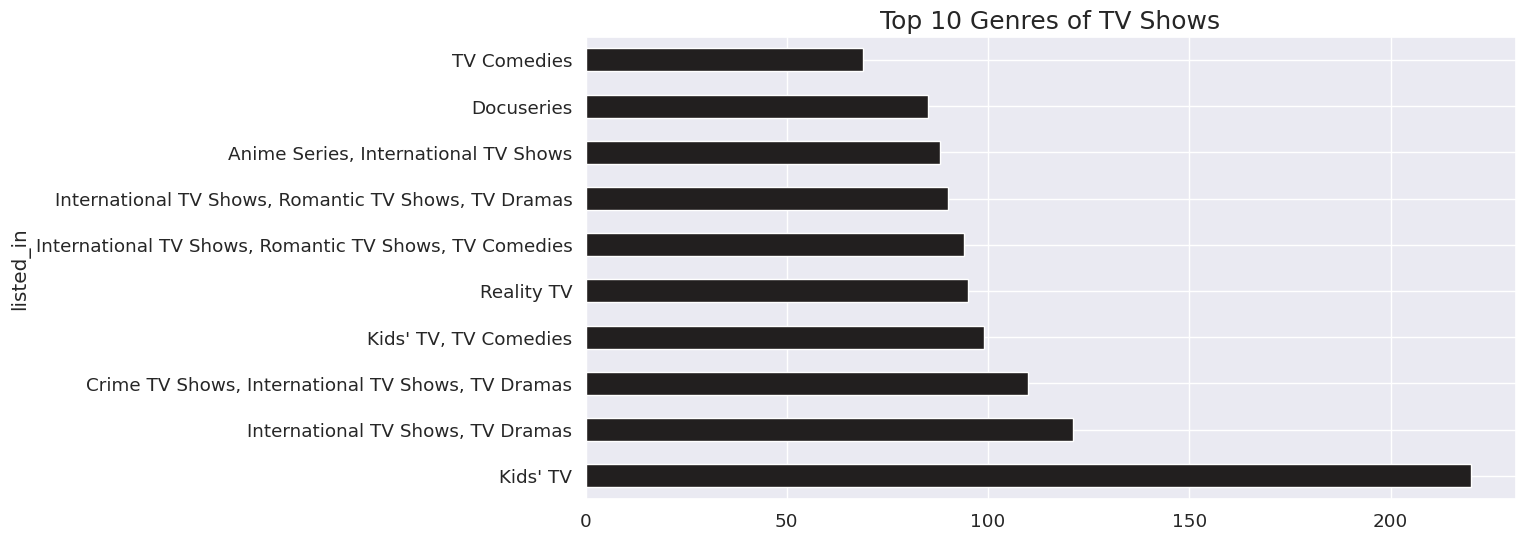

In [ ]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="#221f1f")
plt.title("Top 10 Genres of TV Shows",size=18)

<ipython-input-52-0f2cd5600927>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




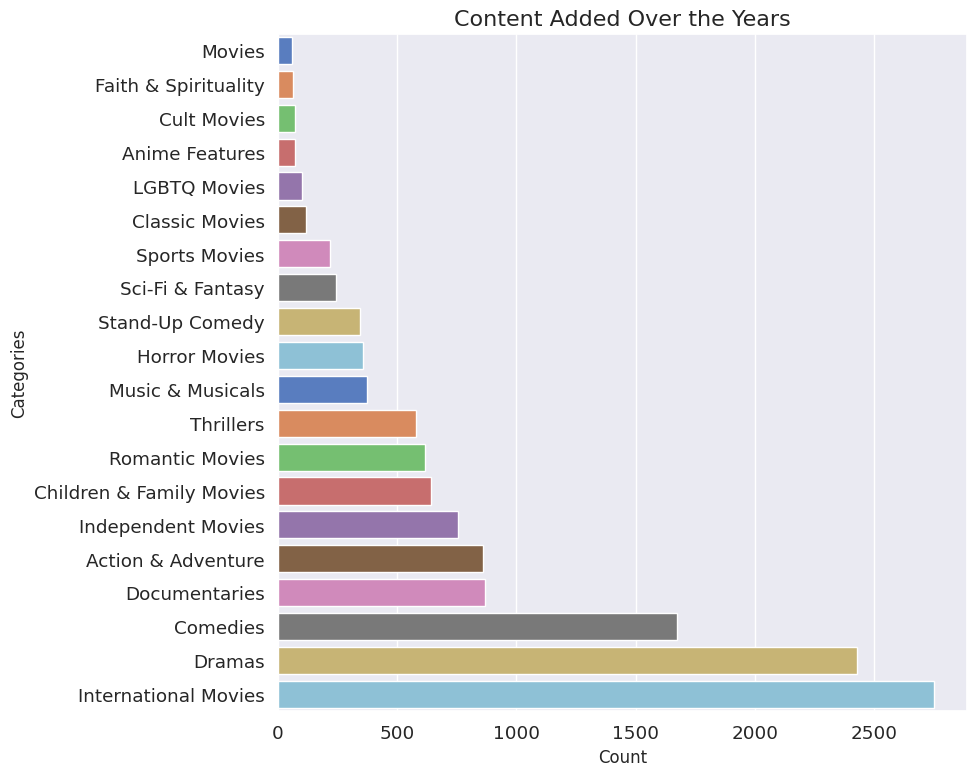

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

# Data Preparation
col = "listed_in"
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)

# Extracting labels and values
labels = [_[0] for _ in counter_list][::-1]  # reverse the order for horizontal bar
values = [_[1] for _ in counter_list][::-1]  # reverse the order for horizontal bar

# Plotting with Seaborn and Matplotlib
plt.figure(figsize=(10, 8))
sns.barplot(x=values, y=labels, palette="muted")  # Horizontal bar chart

# Adding titles and labels
plt.title('Content Added Over the Years', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Categories', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-53-c8a5af764524>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




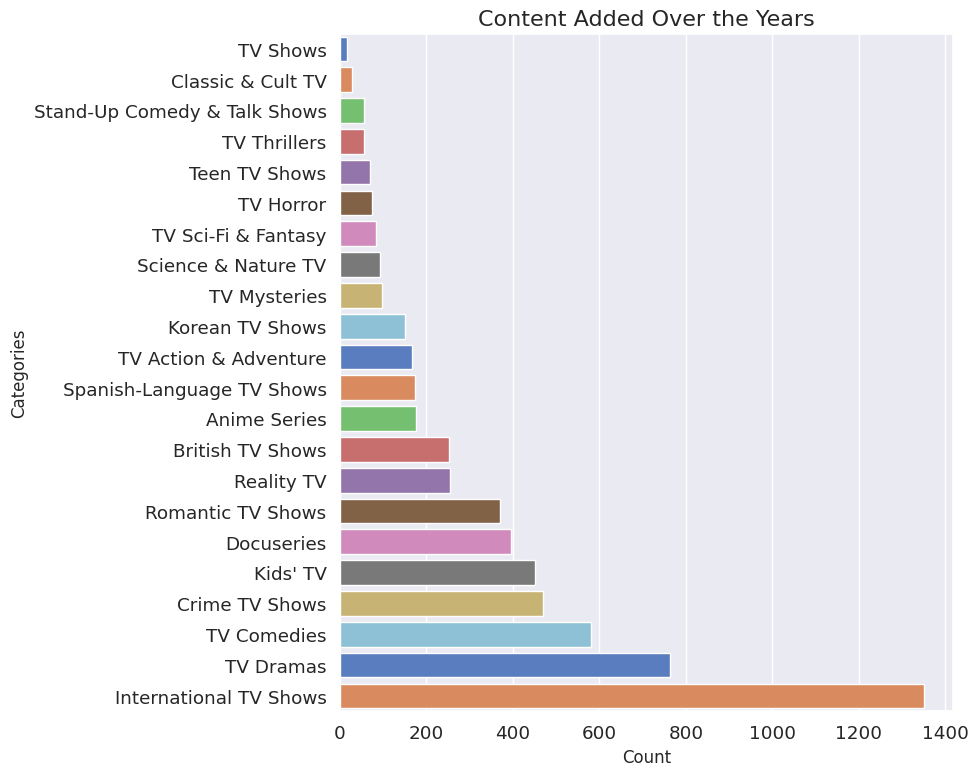

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

# Data Preparation
col = "listed_in"
categories = ", ".join(d1['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)

# Extracting labels and values
labels = [_[0] for _ in counter_list][::-1]  # reverse the order for horizontal bar
values = [_[1] for _ in counter_list][::-1]  # reverse the order for horizontal bar

# Plotting with Seaborn and Matplotlib
plt.figure(figsize=(10, 8))
sns.barplot(x=values, y=labels, palette="muted")  # Horizontal bar chart

# Adding titles and labels
plt.title('Content Added Over the Years', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Categories', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

**Top Actors on Netflix with Most Movie**

---



In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter

def country_trace(country, flag="movie"):
    df["from_country"] = df['country'].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small = df[df["from_country"] == 1]

    # Filter hanya untuk movie
    small = small[small["duration"] != ""]

    # Mengumpulkan aktor
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0] + "  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#6ad49b"))
    return trace

# Daftar negara yang ingin ditampilkan
titles = ["United States", "", "South Korea", "", "United Kingdom", "Canada", "", "Spain", "", "Japan"]
traces = []

for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()

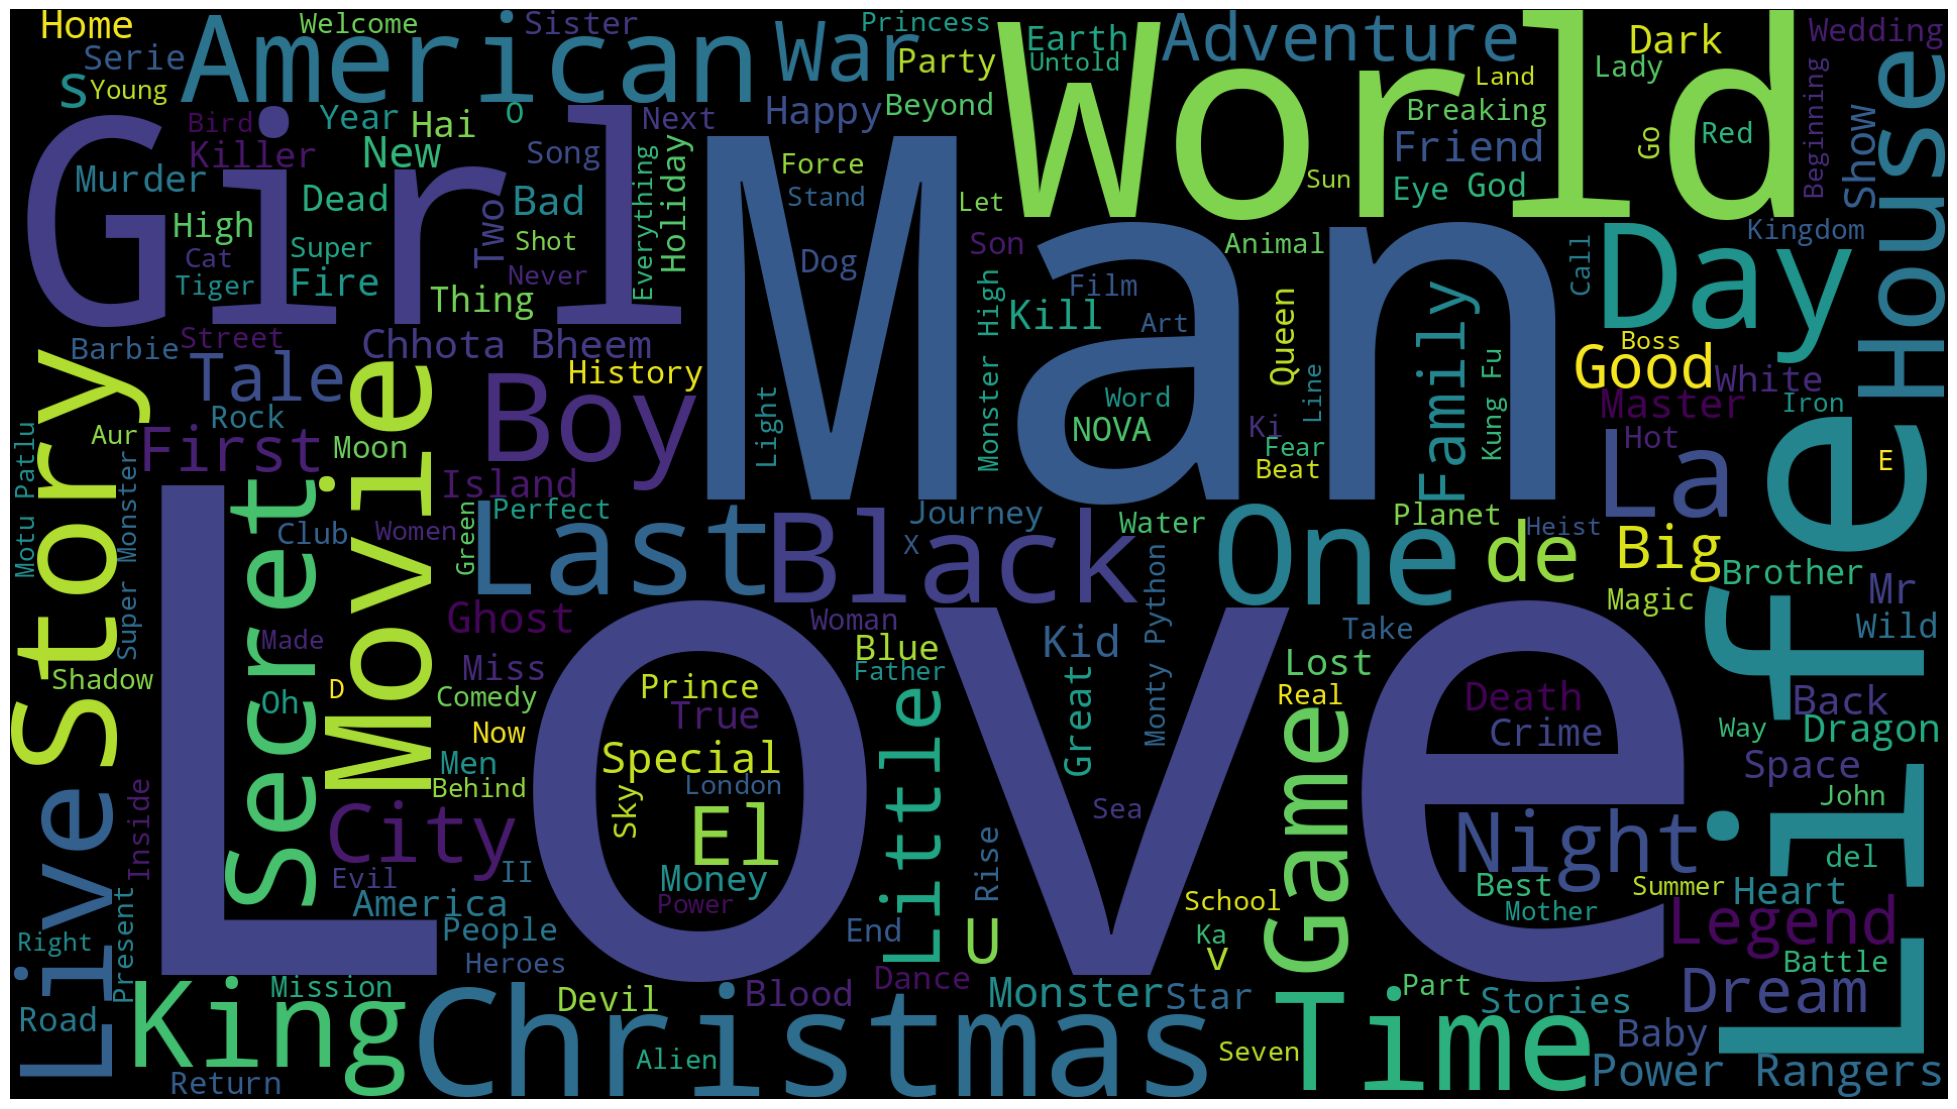

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

# **RECOMENDATIONS**

---
Untuk meningkatkan daya tarik dan retensi pengguna, Netflix disarankan untuk memperbanyak produksi **TV Shows** multi-season, memperkaya variasi durasi film, memperluas katalog dari negara-negara non-tradisional seperti Korea Selatan dan Spanyol dengan memanfaatkan popularitas aktor-aktor terkemuka , serta memperluas genre yang belum terwakili secara signifikan seperti **Science Fiction** dan **Fantasy**.
